### Name: Jainam Jain 
### UID: 2018130016
### Batch A
### BE COMPS

### Objective: 
#### 1. To perform time series analysis: identifying the nature of the phenomenon represented by the sequence of observations, and forecasting

### Import Necessary Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(rc = {'figure.figsize':(15,8)})

### Load the AirQuality Dataset into Pandas DataFrame

In [ ]:
dataset_filename = 'AirQualityUCI.csv'
df = pd.read_csv(dataset_filename,';')
df.head()

C:\Users\jiten\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


### Delete Duplicate Rows if Present

In [ ]:
df = df.drop_duplicates()
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [ ]:
def remove_comma_and_convert_to_float(x):
    x = str(x)
    x = x.replace(',', '.')
    return x

In [ ]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [ ]:
df['CO(GT)'] = df['CO(GT)'].apply(remove_comma_and_convert_to_float).astype(np.float16)

df['C6H6(GT)'] = df['C6H6(GT)'].apply(remove_comma_and_convert_to_float).astype(np.float16)

df['T'] = df['T'].apply(remove_comma_and_convert_to_float).astype(np.float16)

df['RH'] = df['RH'].apply(remove_comma_and_convert_to_float).astype(np.float16)

df['AH'] = df['AH'].apply(remove_comma_and_convert_to_float).astype(np.float16)

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.599609,1360.0,150.0,11.898438,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.601562,48.90625,0.757812,NaN,NaN
1,10/03/2004,19.00.00,2.000000,1292.0,112.0,9.398438,955.0,103.0,1174.0,92.0,1559.0,972.0,13.296875,47.68750,0.725586,NaN,NaN
2,10/03/2004,20.00.00,2.199219,1402.0,88.0,9.000000,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.898438,54.00000,0.750000,NaN,NaN
3,10/03/2004,21.00.00,2.199219,1376.0,80.0,9.203125,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.000000,60.00000,0.786621,NaN,NaN
4,10/03/2004,22.00.00,1.599609,1272.0,51.0,6.500000,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.203125,59.59375,0.788574,NaN,NaN


### Check for Missing Values

<AxesSubplot:>

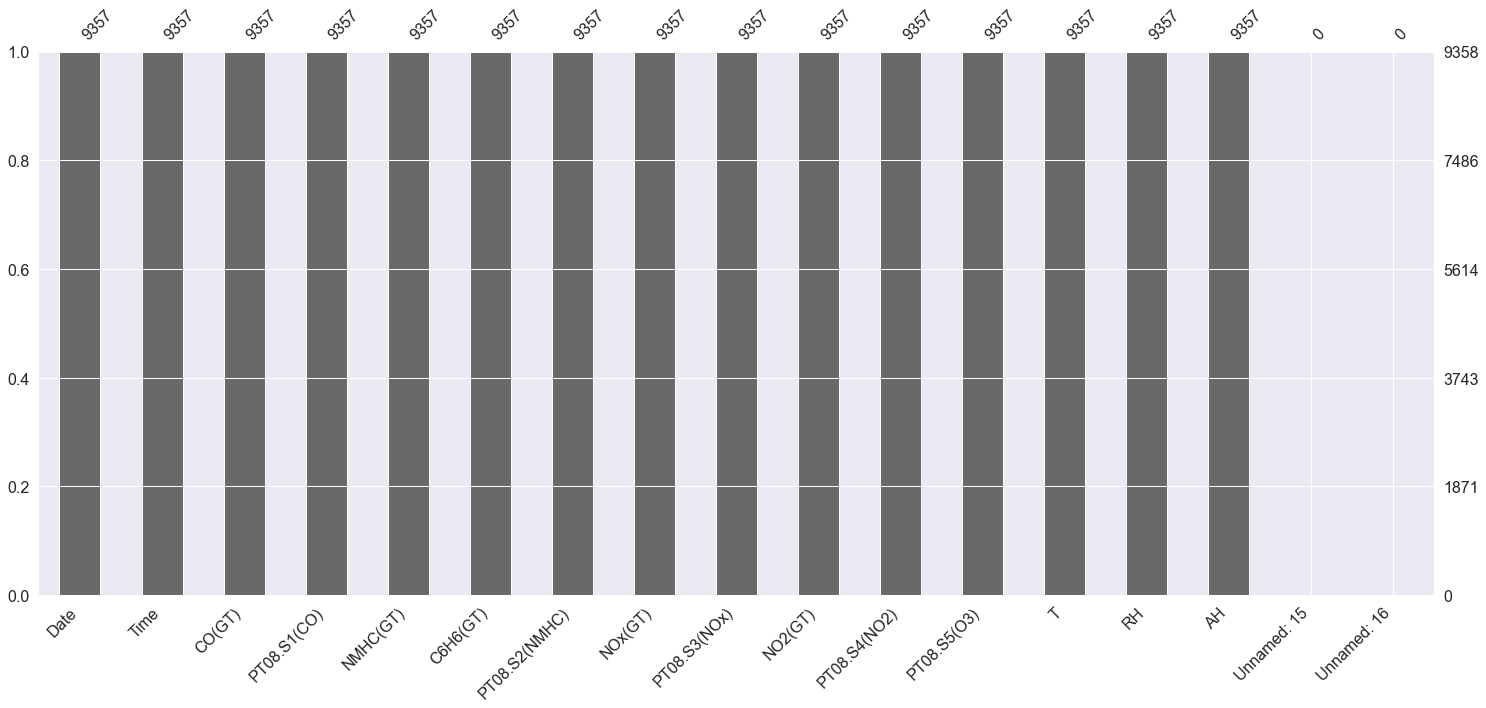

In [ ]:
import missingno
missingno.bar(df)

In [ ]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

### As columns Unnamed: 15 and Unnamed: 16 are completely empty so these columns are ignored 

In [ ]:
df.drop(['Unnamed: 15', 'Unnamed: 16'], inplace=True, axis=1)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.599609,1360.0,150.0,11.898438,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.601562,48.90625,0.757812
1,10/03/2004,19.00.00,2.000000,1292.0,112.0,9.398438,955.0,103.0,1174.0,92.0,1559.0,972.0,13.296875,47.68750,0.725586
2,10/03/2004,20.00.00,2.199219,1402.0,88.0,9.000000,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.898438,54.00000,0.750000
3,10/03/2004,21.00.00,2.199219,1376.0,80.0,9.203125,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.000000,60.00000,0.786621
4,10/03/2004,22.00.00,1.599609,1272.0,51.0,6.500000,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.203125,59.59375,0.788574


### In this dataset, missing values are tagged with -200

### Get the Missing values of each col 
### Values tagged as -200

In [ ]:
from collections import Counter

for col in df.columns:
    if -200 in df[col].unique():
        counts = Counter(df[col])
        print(f'For {col} ==> {counts[-200]} ({counts[-200] / len(df)})')

For CO(GT) ==> 1683 (0.17984612096601837)
For PT08.S1(CO) ==> 366 (0.03911092113699508)
For NMHC(GT) ==> 8443 (0.9022226971575122)
For C6H6(GT) ==> 366 (0.03911092113699508)
For PT08.S2(NMHC) ==> 366 (0.03911092113699508)
For NOx(GT) ==> 1639 (0.17514426159435778)
For PT08.S3(NOx) ==> 366 (0.03911092113699508)
For NO2(GT) ==> 1642 (0.1754648429151528)
For PT08.S4(NO2) ==> 366 (0.03911092113699508)
For PT08.S5(O3) ==> 366 (0.03911092113699508)
For T ==> 366 (0.03911092113699508)
For RH ==> 366 (0.03911092113699508)
For AH ==> 366 (0.03911092113699508)


### From above we can see that NMHC(GT) has 90% data missing hence it will be dropped

In [ ]:
df.drop('NMHC(GT)', inplace=True, axis=1)

### Replacing the -200 values with nan values so it can be detected easily

In [ ]:
df.replace(-200, np.nan, inplace=True)

<AxesSubplot:>

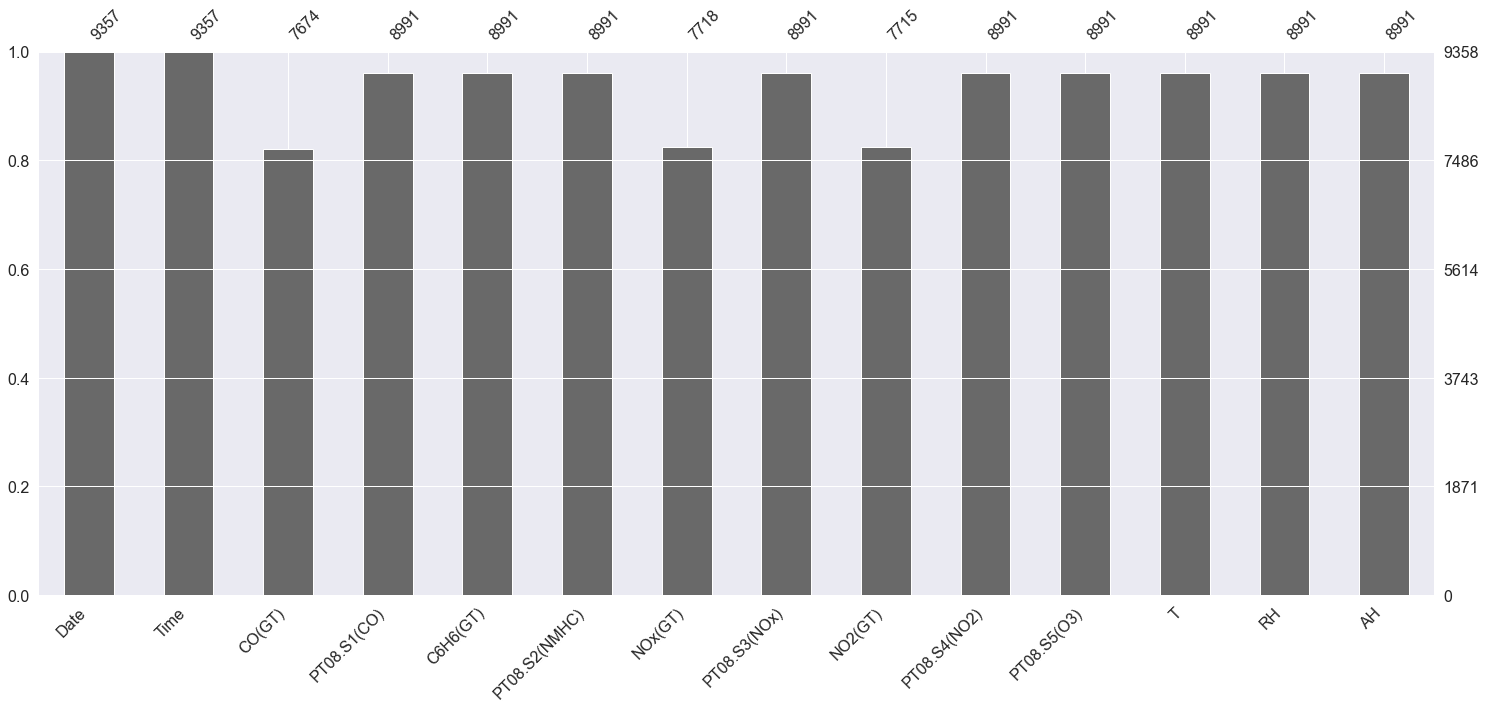

In [ ]:
missingno.bar(df)

### Missing Values are Imputed with Median values

In [ ]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [ ]:
missing_value_cols = [
    'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
    'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 
    'PT08.S5(O3)', 'T', 'RH', 'AH'
]

for col in missing_value_cols:
    df[col].replace(np.nan, df[col].median(), inplace=True)

<AxesSubplot:>

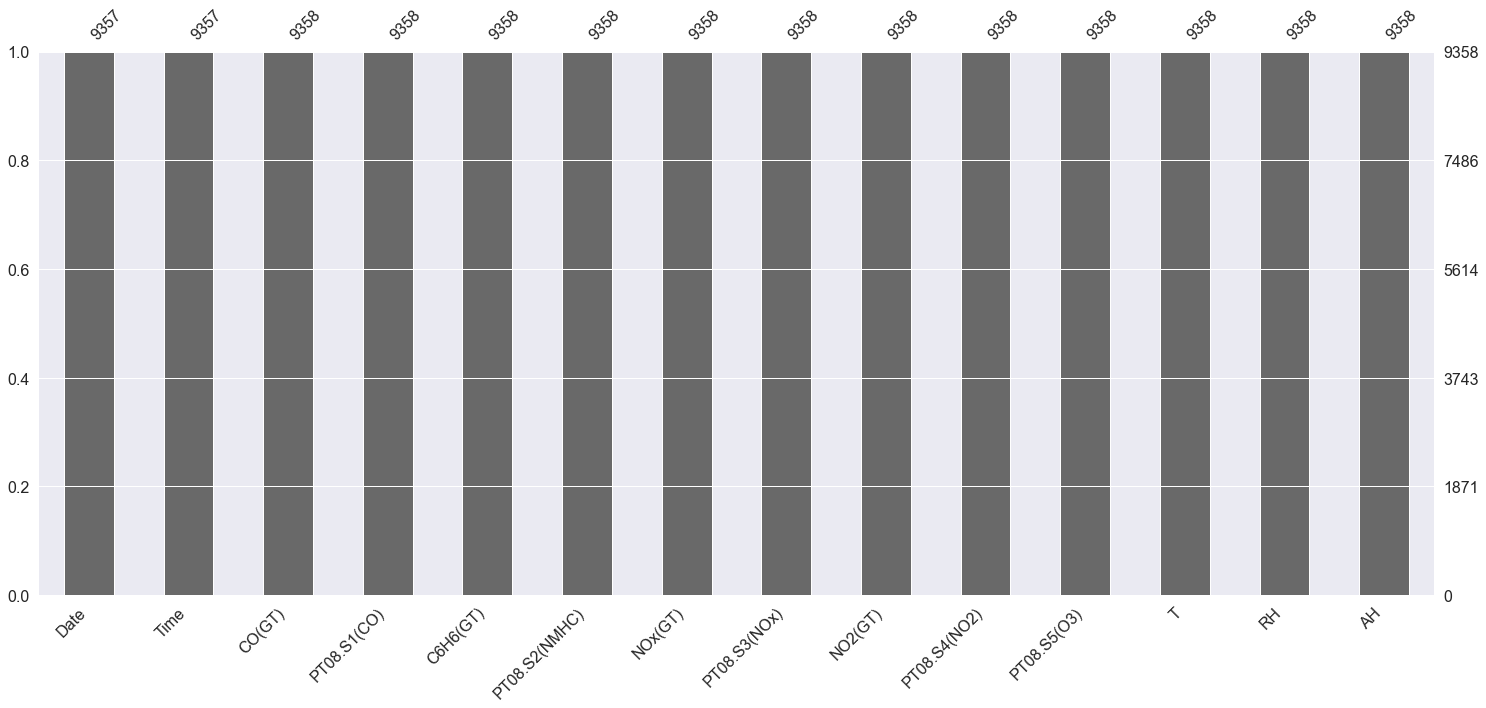

In [ ]:
missingno.bar(df)

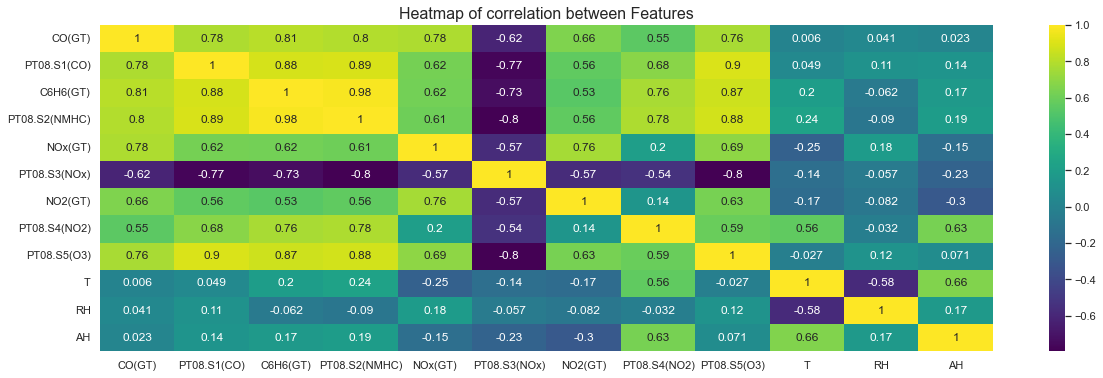

In [ ]:
# now see the correlation among all the attributes 
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(),annot=True,cmap='viridis',ax=ax)
plt.title('Heatmap of correlation between Features',fontsize=16)
plt.show();

### Create a Time Index

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.599609,1360.0,11.898438,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.601562,48.90625,0.757812
1,10/03/2004,19.00.00,2.000000,1292.0,9.398438,955.0,103.0,1174.0,92.0,1559.0,972.0,13.296875,47.68750,0.725586
2,10/03/2004,20.00.00,2.199219,1402.0,9.000000,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.898438,54.00000,0.750000
3,10/03/2004,21.00.00,2.199219,1376.0,9.203125,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.000000,60.00000,0.786621
4,10/03/2004,22.00.00,1.599609,1272.0,6.500000,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.203125,59.59375,0.788574


In [ ]:
df['Date'].isna().sum()

1

### Drop nan rows in Date col from the dataset

In [ ]:
len(df[df.isna()])

9358

In [ ]:
df = df[df['Date'].notna()]

In [ ]:
df['Year'] = df['Date'].apply(lambda x: str(x).split('/')[-1]).astype(np.float16)
df['Month'] = df['Date'].apply(lambda x: str(x).split('/')[-2]).astype(np.float16)

df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month
0,10/03/2004,18.00.00,2.599609,1360.0,11.898438,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.601562,48.90625,0.757812,2004.0,3.0
1,10/03/2004,19.00.00,2.000000,1292.0,9.398438,955.0,103.0,1174.0,92.0,1559.0,972.0,13.296875,47.68750,0.725586,2004.0,3.0
2,10/03/2004,20.00.00,2.199219,1402.0,9.000000,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.898438,54.00000,0.750000,2004.0,3.0
3,10/03/2004,21.00.00,2.199219,1376.0,9.203125,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.000000,60.00000,0.786621,2004.0,3.0
4,10/03/2004,22.00.00,1.599609,1272.0,6.500000,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.203125,59.59375,0.788574,2004.0,3.0


### Italy has 4 seasons and their durations are as follows

1. Italy During March to May (Spring):
2. Italy During June to August (summer):
3. Italy During September to November (Autumn ):
4. Italy During December to February (Winter)

In [ ]:
def set_season_from_month(month):
    if month >= 3 and month <= 5:
        return 1
    elif month >= 6 and month <= 8:
        return 2
    elif month >= 9 and month <= 11:
        return 3
    
    return 4

df['Season'] = df['Month'].apply(set_season_from_month)

df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Season
0,10/03/2004,18.00.00,2.599609,1360.0,11.898438,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.601562,48.90625,0.757812,2004.0,3.0,1
1,10/03/2004,19.00.00,2.000000,1292.0,9.398438,955.0,103.0,1174.0,92.0,1559.0,972.0,13.296875,47.68750,0.725586,2004.0,3.0,1
2,10/03/2004,20.00.00,2.199219,1402.0,9.000000,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.898438,54.00000,0.750000,2004.0,3.0,1
3,10/03/2004,21.00.00,2.199219,1376.0,9.203125,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.000000,60.00000,0.786621,2004.0,3.0,1
4,10/03/2004,22.00.00,1.599609,1272.0,6.500000,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.203125,59.59375,0.788574,2004.0,3.0,1


### Store the mapping of seasons 

In [ ]:
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Autumn',
    4: 'Winter'
}

### Months of the data for both the years do not overlap

In [ ]:
df[df.Year == 2004]['Month'].unique()

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.], dtype=float16)

In [ ]:
df[df.Year == 2005]['Month'].unique()

array([1., 2., 3., 4.], dtype=float16)

### Plotting all the values on the basis of Season

<AxesSubplot:ylabel='PT08.S3(NOx)'>

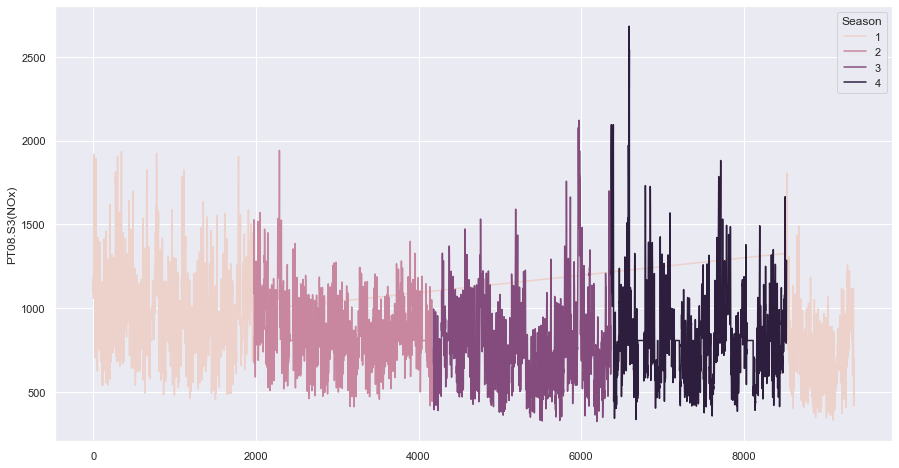

In [ ]:
sns.lineplot(x=range(0, len(df)), y=df['PT08.S3(NOx)'], hue=df['Season'])

#### We can see PT08.S3(NOx) decreases from season 1 to season 2 and from season 2 to season 3

<AxesSubplot:ylabel='NO2(GT)'>

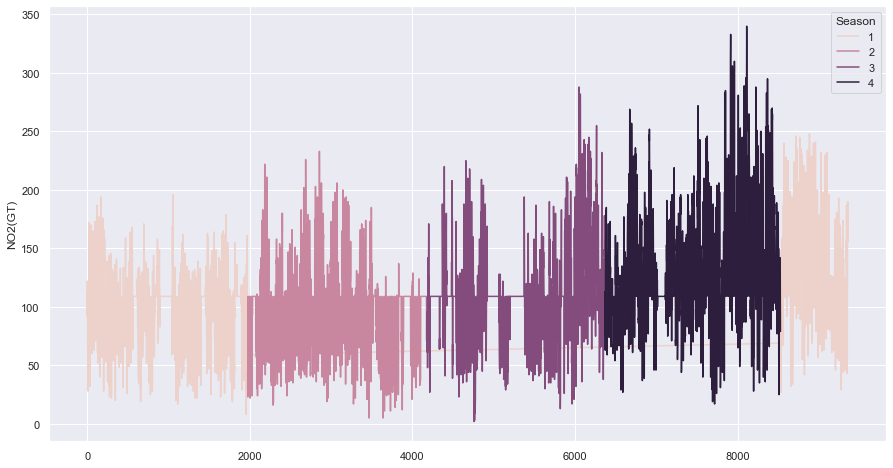

In [ ]:
sns.lineplot(x=range(0, len(df)), y=df['NO2(GT)'], hue=df['Season'])

#### We can see NO2(GT), decreases from season 1 to season 2 and  keeps on rising from season 3 to season 4

<AxesSubplot:ylabel='PT08.S4(NO2)'>

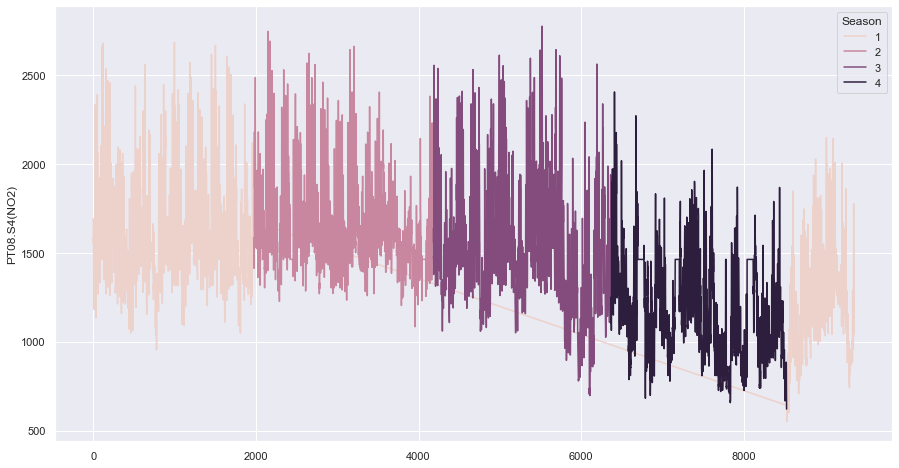

In [ ]:
sns.lineplot(x=range(0, len(df)), y=df['PT08.S4(NO2)'], hue=df['Season'])

#### We can see PT08.S4(NO2) rises from season 1 and 2 and dereases as it approaches season 3 to season 4

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
mean_season_value = df['Season'].value_counts().mean()
mean_season_value

2339.25

### Plotting Trend and Seasonality for all Features that vary with time

### Trend

Trend is a pattern in data that shows the movement of a series to relatively higher or lower values over a long period of time. In other words, a trend is observed when there is an increasing or decreasing slope in the time series.m

### Seasonality

Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year

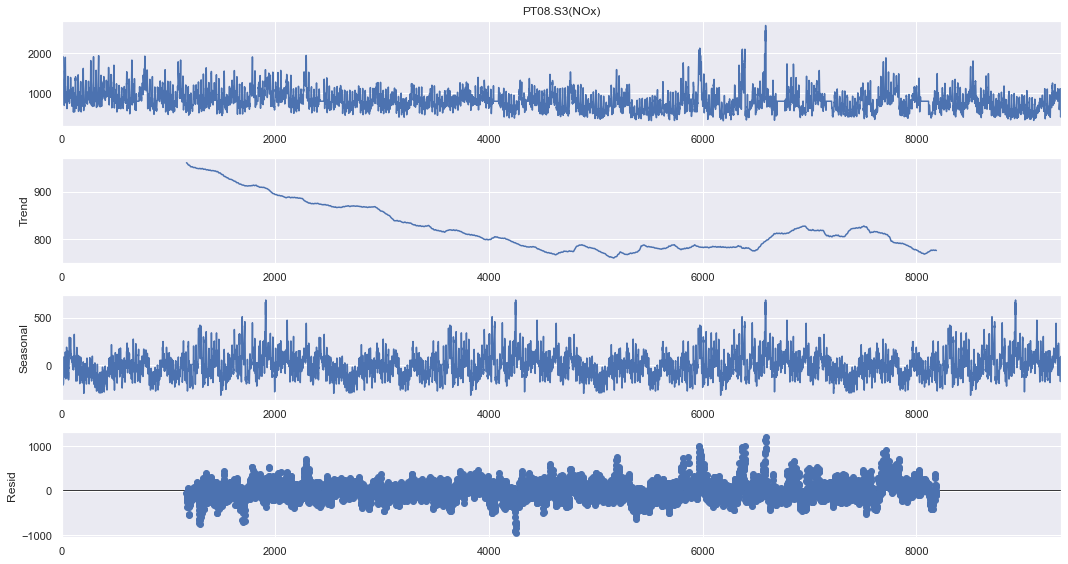

In [ ]:
figure = seasonal_decompose(df['PT08.S3(NOx)'], period=int(mean_season_value)).plot()
plt.show()

#### PT08.S3(NOx) has decreasing trend strictly

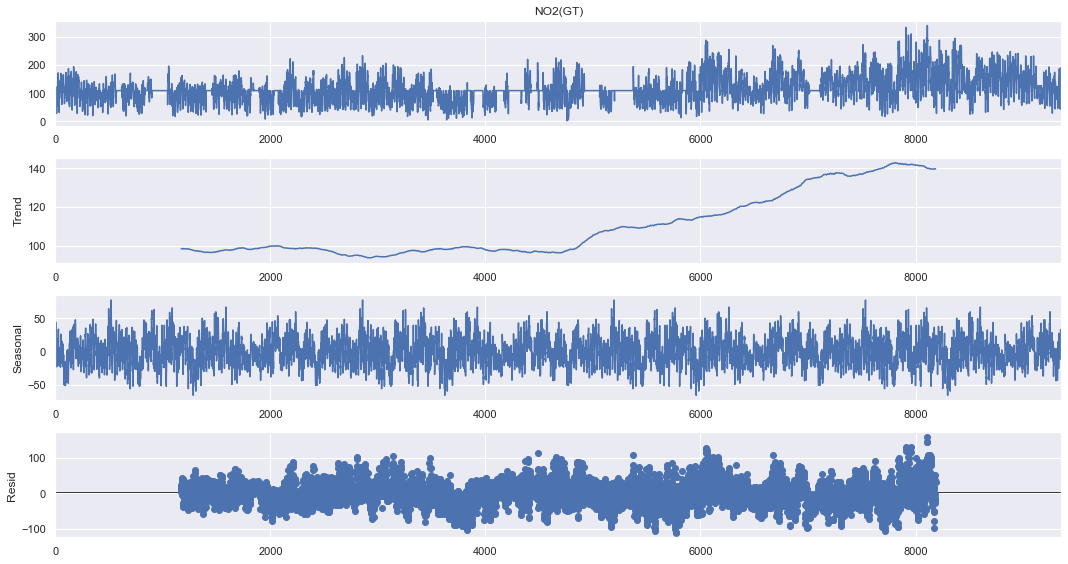

In [ ]:
figure = seasonal_decompose(df['NO2(GT)'], period=int(mean_season_value)).plot()
plt.show()

#### NO2(GT) has increasing trend strictly

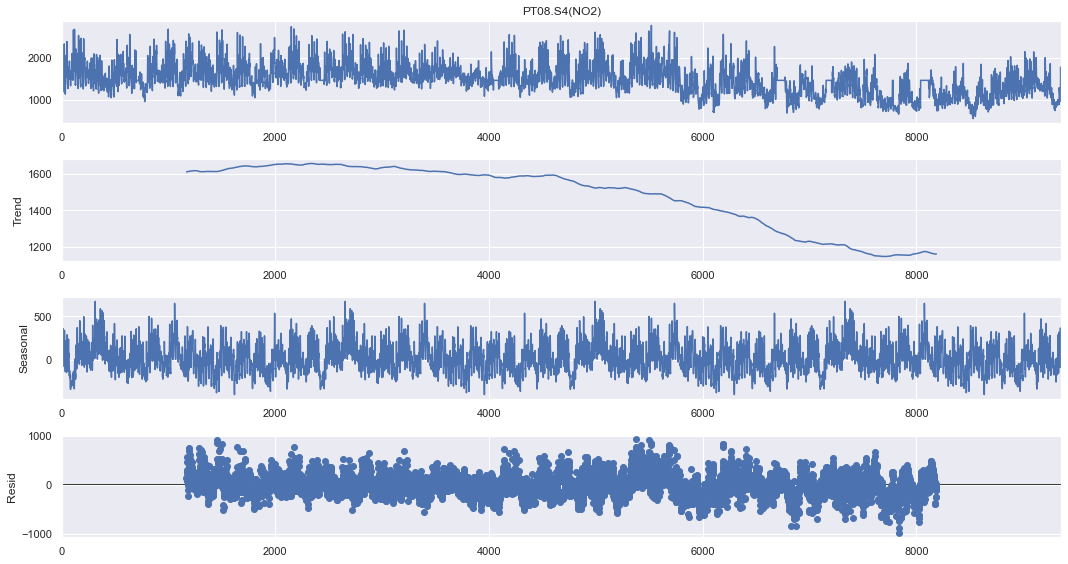

In [ ]:
figure = seasonal_decompose(df['PT08.S4(NO2)'], period=int(mean_season_value)).plot()
plt.show()

#### PT08.S4(NO2) has decreasing trend strictly

In [ ]:
from statsmodels.tsa.stattools import adfuller

adft = adfuller(df['PT08.S4(NO2)'], autolag="AIC")

output_df = pd.DataFrame(
    {'Metric':
     ['ADF Statistic','p-value','No. of lags used','Number of observations used',
'critical value (1%)', 'critical value (5%)', 'critical value (10%)'],
    'Values':[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]
    }
)
print(output_df)

                        Metric        Values
0                ADF Statistic -6.320533e+00
1                      p-value  3.074059e-08
2             No. of lags used  3.700000e+01
3  Number of observations used  9.319000e+03
4          critical value (1%) -3.431052e+00
5          critical value (5%) -2.861850e+00
6         critical value (10%) -2.566935e+00


### Since p value is less 0.05 hence we reject the null hypothesis so the given feature is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

adft = adfuller(df['NO2(GT)'], autolag="AIC")

output_df = pd.DataFrame(
    {'Metric':
     ['ADF Statistic','p-value','No. of lags used','Number of observations used',
'critical value (1%)', 'critical value (5%)', 'critical value (10%)'],
    'Values':[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]
    }
)
print(output_df)

                        Metric        Values
0                ADF Statistic -8.087819e+00
1                      p-value  1.404315e-12
2             No. of lags used  3.200000e+01
3  Number of observations used  9.324000e+03
4          critical value (1%) -3.431052e+00
5          critical value (5%) -2.861850e+00
6         critical value (10%) -2.566935e+00


### Since p value is less 0.05 hence we reject the null hypothesis so the given feature is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

adft = adfuller(df['PT08.S3(NOx)'], autolag="AIC")

output_df = pd.DataFrame(
    {'Metric':
     ['ADF Statistic','p-value','No. of lags used','Number of observations used',
'critical value (1%)', 'critical value (5%)', 'critical value (10%)'],
    'Values':[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]
    }
)
print(output_df)

                        Metric        Values
0                ADF Statistic -1.064757e+01
1                      p-value  4.752058e-19
2             No. of lags used  3.600000e+01
3  Number of observations used  9.320000e+03
4          critical value (1%) -3.431052e+00
5          critical value (5%) -2.861850e+00
6         critical value (10%) -2.566935e+00


### Since p value is less 0.05 hence we reject the null hypothesis so the given feature is stationary

### Features 

PT08.S4(NO2), NO2(GT), PT08.S3(NOx)

## AutoCorrelation

Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals. Autocorrelation measures the relationship between a variable's current value and its past values.

Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals


Use Cases
<br/>
Help us uncover hidden patterns in our data and help us select the correct forecasting methods.
Help identify seasonality in our time series data.
Analyzing the autocorrelation function (ACF) and partial autocorrelation function (PACF) in conjunction is necessary for selecting the appropriate ARIMA model for any time series prediction.

### Lag

A “lag” is a fixed amount of passing time
Lags are very useful in time series analysis because of a phenomenon called autocorrelation, which is a tendency for the values within a time series to be correlated with previous copies of itself.

In [ ]:
autocorrelation_lag1 = df['PT08.S4(NO2)'].autocorr(lag=24)
print("One Day Lag: ", autocorrelation_lag1)

One Day Lag:  0.7555102219910076


In [ ]:
autocorrelation_lag1 = df['NO2(GT)'].autocorr(lag=24)
print("One Day Lag: ", autocorrelation_lag1)

One Day Lag:  0.6811416170430904


In [ ]:
autocorrelation_lag1 = df['PT08.S3(NOx)'].autocorr(lag=24)
print("One Day Lag: ", autocorrelation_lag1)

One Day Lag:  0.6043900710281895


In [ ]:
autocorrelation_lag7 = df['PT08.S4(NO2)'].autocorr(lag=24*7)
print('Three Month Lag: ', autocorrelation_lag7)
autocorrelation_lag14 = df['PT08.S4(NO2)'].autocorr(lag=24*14)
print('Six Month Lag: ', autocorrelation_lag14)
autocorrelation_lag21 = df['PT08.S4(NO2)'].autocorr(lag=24*21)
print('Nine Month Lag: ', autocorrelation_lag21)

Three Month Lag:  0.6290290052493471
Six Month Lag:  0.5816999105483156
Nine Month Lag:  0.5987945699317346


In [ ]:
autocorrelation_lag7 = df['NO2(GT)'].autocorr(lag=24*7)
print('Three Month Lag: ', autocorrelation_lag7)
autocorrelation_lag14 = df['NO2(GT)'].autocorr(lag=24*14)
print('Six Month Lag: ', autocorrelation_lag14)
autocorrelation_lag21 = df['NO2(GT)'].autocorr(lag=24*21)
print('Nine Month Lag: ', autocorrelation_lag21)

Three Month Lag:  0.5836809195313635
Six Month Lag:  0.5390525779827384
Nine Month Lag:  0.530717688829805


In [ ]:
autocorrelation_lag7 = df['PT08.S3(NOx)'].autocorr(lag=24*7)
print('Three Month Lag: ', autocorrelation_lag7)
autocorrelation_lag14 = df['PT08.S3(NOx)'].autocorr(lag=24*14)
print('Six Month Lag: ', autocorrelation_lag14)
autocorrelation_lag21 = df['PT08.S3(NOx)'].autocorr(lag=24*21)
print('Nine Month Lag: ', autocorrelation_lag21)

Three Month Lag:  0.4773456665348672
Six Month Lag:  0.42382005988225774
Nine Month Lag:  0.46615654478504454


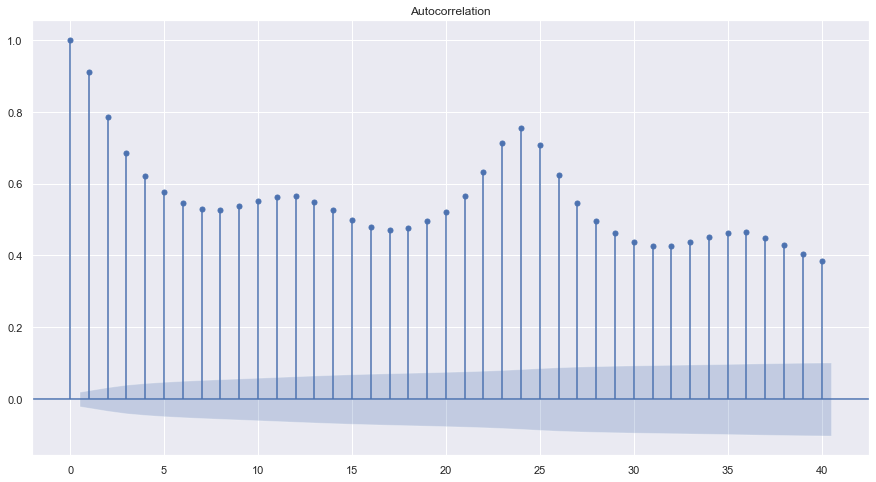

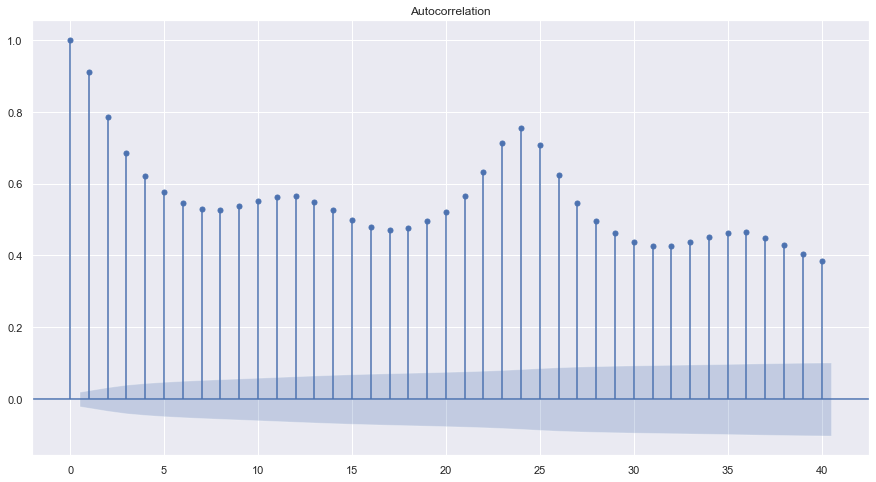

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['PT08.S4(NO2)'])

### We can see a repeating pattern after every 24 lags

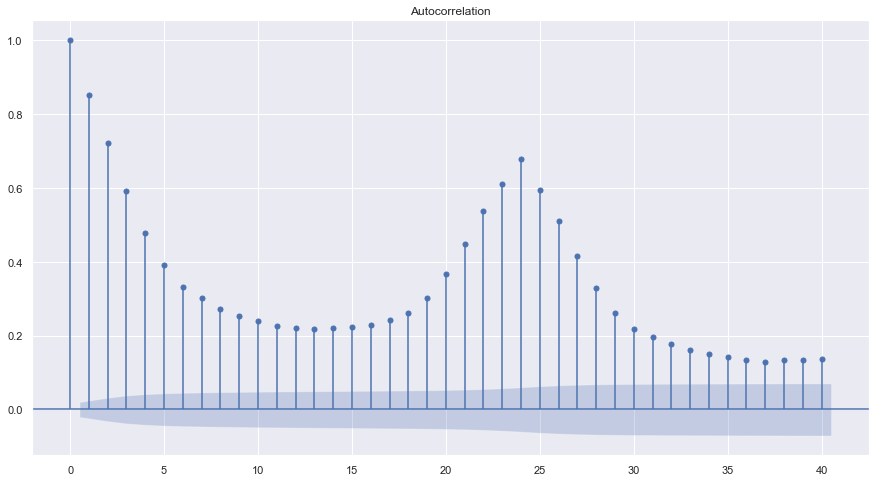

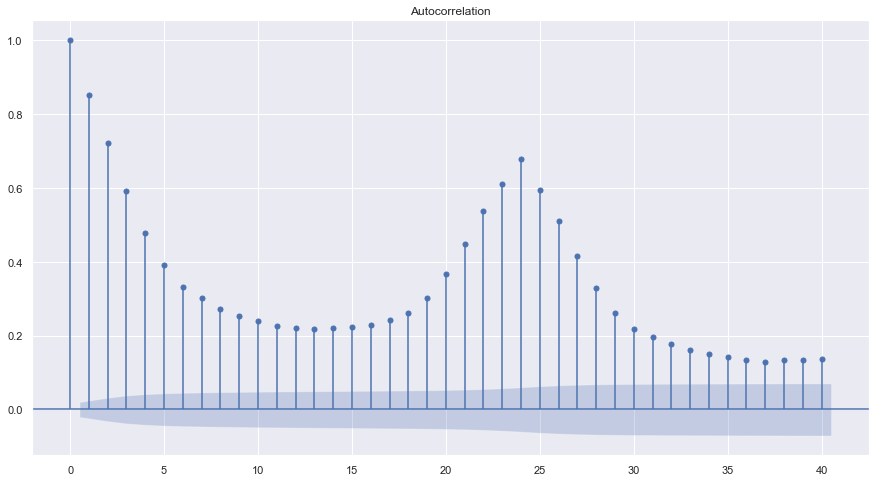

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['NO2(GT)'])

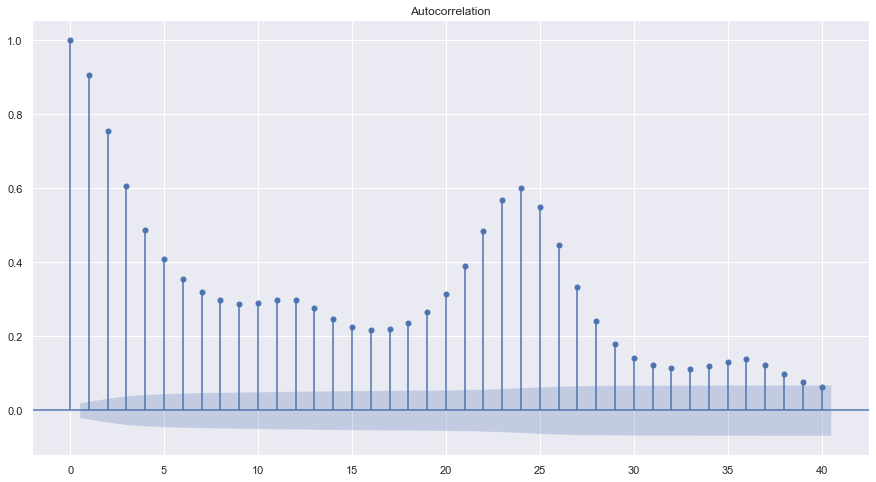

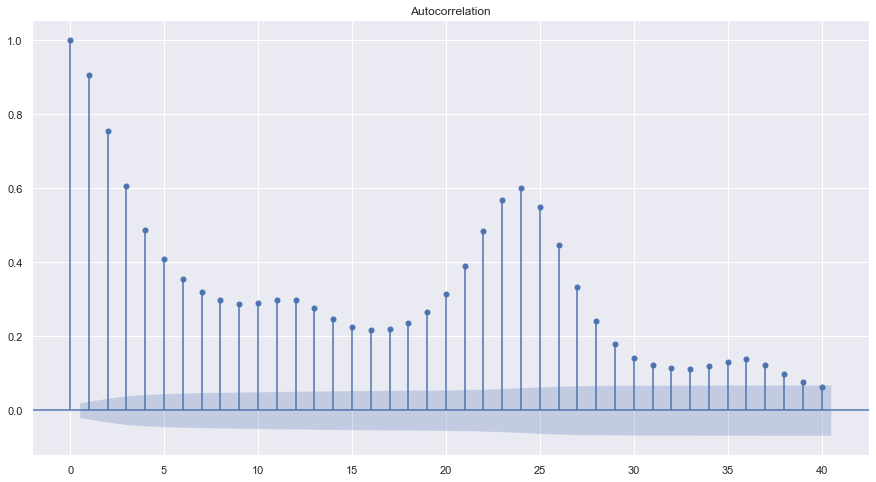

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['PT08.S3(NOx)'])

In [ ]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Season
9352,04/04/2005,10.00.00,3.099609,1314.0,13.500000,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.906250,29.296875,0.756836,2005.0,4.0,1
9353,04/04/2005,11.00.00,2.400391,1163.0,11.398438,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.296875,23.703125,0.711914,2005.0,4.0,1
9354,04/04/2005,12.00.00,2.400391,1142.0,12.398438,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.906250,18.296875,0.640625,2005.0,4.0,1
9355,04/04/2005,13.00.00,2.099609,1003.0,9.500000,961.0,235.0,702.0,156.0,1041.0,770.0,28.296875,13.500000,0.513672,2005.0,4.0,1
9356,04/04/2005,14.00.00,2.199219,1071.0,11.898438,1047.0,265.0,654.0,168.0,1129.0,816.0,28.500000,13.101562,0.502930,2005.0,4.0,1


### Prediction 

In [ ]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [ ]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float16
PT08.S1(CO)             float64
C6H6(GT)                float16
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float16
RH                      float16
AH                      float16
Year                    float16
Month                   float16
Season                    int64
dtype: object

In [ ]:
train = df[df['Date'] < datetime.strptime('2005-01-01','%Y-%m-%d')]

test = df[df['Date'] >= datetime.strptime('2005-01-01','%Y-%m-%d')][['Date', 'PT08.S4(NO2)']]


In [ ]:
test.head()

,Date,PT08.S4(NO2)
7110,2005-01-01,898.0
7111,2005-01-01,1024.0
7112,2005-01-01,1002.0
7113,2005-01-01,1001.0
7114,2005-01-01,967.0


### Conclusion

1. Performed EDA on time seried Dataset.
2. Identified trends and seasonality in the time series Dataset

### References
1. [Air Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Air+quality)
2. [Stationary Time Series](https://www.geeksforgeeks.org/how-to-check-if-time-series-data-is-stationary-with-python/)
3. [Dickey Fuller Test](https://www.statology.org/dickey-fuller-test-python/)
4. [Autocorrelation](https://statisticsbyjim.com/time-series/autocorrelation-partial-autocorrelation/#:~:text=Autocorrelation%20is%20the%20correlation%20between,values%20influence%20the%20current%20value.)